In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import gaussian_kde

from thinkstats2 import Pmf, Cdf
import thinkplot

from utils import decorate

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 

0=setosa, 1=versicolor, 2=virginica

In [8]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['flower'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

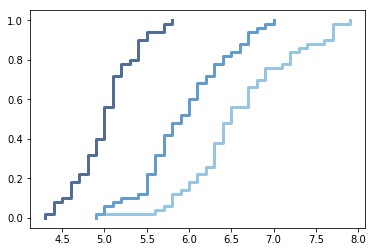

In [42]:
setosa = df[df.flower == 0]
versicolor = df[df.flower == 1].reset_index(drop=True)
virginica = df[df.flower == 2].reset_index(drop=True)

Cdf_0sl = thinkstats2.Cdf(setosa['sepal length (cm)'])
Cdf_1sl = thinkstats2.Cdf(versicolor['sepal length (cm)'])
Cdf_2sl = thinkstats2.Cdf(virginica['sepal length (cm)'])

thinkplot.PrePlot(3)
thinkplot.Cdfs([Cdf_0sl, Cdf_1sl, Cdf_2sl])

iris.feature_names

/home/spereira/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


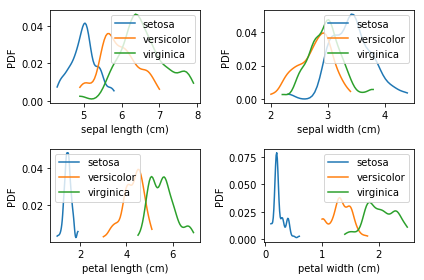

In [62]:
for fl in [setosa,versicolor,virginica]:

    
    for i, feature in enumerate(iris.feature_names):

        kde = gaussian_kde(fl[feature],bw_method=0.3)

        xs = np.linspace(fl[feature].min(), fl[feature].max())
        ds = kde.evaluate(xs)
        ds /= ds.sum()

        plt.subplot(2,2,i+1)

        plt.plot(xs, ds, label=iris.target_names[fl.flower[0]])

        decorate(xlabel=feature, ylabel='PDF')

In [86]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=23, stratify=y)

bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))

bayes.score(X_test, y_test) 

Test set predictions:
 [0 2 1 0 2 0 2 0 1 1 0 1 2 2 0 0 1 2 1 1 0 2 2 2 2 0 1 1 2 1 0 2 0 1 1 2 0
 0 2 0 0 1 1 1 1]


0.9777777777777777

In [87]:
y_test

array([0, 2, 1, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1,
       1])

In [88]:
mis_class = y_pred-y_test

In [89]:
for i in range(len(mis_class)):
    if(mis_class[i]!=0):
        print("Flower:", y_test[i], "   Guess:",y_pred[i], "   Data:", X_test[i])

Flower: 2    Guess: 1    Data: [6.3 2.8 5.1 1.5]


In [90]:
def Bayesian(seed):
    X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

    bayes = GaussianNB()
    bayes.fit(X_train, y_train)
    y_pred = bayes.predict(X_test)

    bayes.score(X_test, y_test) 
    
    mis_class = y_pred-y_test
    
    for i in range(len(mis_class)):
        if(mis_class[i]!=0):
            print("Flower:", y_test[i], "   Guess:",y_pred[i], "   Data:", X_test[i])

In [94]:
for i in range (20, 30):
    Bayesian(i)
    print("  ")

  
Flower: 1    Guess: 2    Data: [6.9 3.1 4.9 1.5]
  
Flower: 2    Guess: 1    Data: [6.  2.2 5.  1.5]
Flower: 2    Guess: 1    Data: [6.3 2.8 5.1 1.5]
Flower: 1    Guess: 2    Data: [5.9 3.2 4.8 1.8]
  
Flower: 2    Guess: 1    Data: [6.3 2.8 5.1 1.5]
  
Flower: 1    Guess: 2    Data: [6.9 3.1 4.9 1.5]
Flower: 1    Guess: 2    Data: [6.7 3.  5.  1.7]
  
Flower: 2    Guess: 1    Data: [6.3 2.8 5.1 1.5]
Flower: 1    Guess: 2    Data: [5.9 3.2 4.8 1.8]
Flower: 2    Guess: 1    Data: [6.  2.2 5.  1.5]
  
Flower: 2    Guess: 1    Data: [6.  2.2 5.  1.5]
  
Flower: 2    Guess: 1    Data: [6.1 2.6 5.6 1.4]
Flower: 2    Guess: 1    Data: [4.9 2.5 4.5 1.7]
Flower: 2    Guess: 1    Data: [6.  2.2 5.  1.5]
  
Flower: 1    Guess: 2    Data: [6.7 3.  5.  1.7]
Flower: 2    Guess: 1    Data: [6.  2.2 5.  1.5]
Flower: 2    Guess: 1    Data: [6.1 2.6 5.6 1.4]
  
Flower: 2    Guess: 1    Data: [6.  2.2 5.  1.5]
Flower: 2    Guess: 1    Data: [6.3 2.8 5.1 1.5]
  


In [106]:
def  KNeighbors(seed):
    X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    bayes.score(X_test, y_test) 
    
    mis_class = y_pred-y_test
    
    for i in range(len(mis_class)):
        if(mis_class[i]!=0):
            print("Flower:", y_test[i], "   Guess:",y_pred[i], "   Data:", X_test[i])

In [107]:
for i in range (20, 30):
    KNeighbors(i)
    print("  ")

Flower: 1    Guess: 2    Data: [6.  2.7 5.1 1.6]
Flower: 2    Guess: 1    Data: [6.  3.  4.8 1.8]
  
Flower: 1    Guess: 2    Data: [6.  2.7 5.1 1.6]
  
Flower: 2    Guess: 1    Data: [6.  2.2 5.  1.5]
Flower: 2    Guess: 1    Data: [6.3 2.8 5.1 1.5]
Flower: 1    Guess: 2    Data: [5.9 3.2 4.8 1.8]
  
Flower: 2    Guess: 1    Data: [6.  3.  4.8 1.8]
Flower: 2    Guess: 1    Data: [5.9 3.  5.1 1.8]
Flower: 1    Guess: 2    Data: [6.3 2.5 4.9 1.5]
Flower: 2    Guess: 1    Data: [6.3 2.8 5.1 1.5]
Flower: 2    Guess: 1    Data: [6.1 3.  4.9 1.8]
  
Flower: 1    Guess: 2    Data: [6.3 2.5 4.9 1.5]
Flower: 1    Guess: 2    Data: [6.7 3.  5.  1.7]
  
Flower: 1    Guess: 2    Data: [6.3 2.5 4.9 1.5]
Flower: 1    Guess: 2    Data: [5.9 3.2 4.8 1.8]
Flower: 2    Guess: 1    Data: [6.  2.2 5.  1.5]
  
Flower: 2    Guess: 1    Data: [6.  2.2 5.  1.5]
Flower: 1    Guess: 2    Data: [6.3 2.5 4.9 1.5]
  
Flower: 2    Guess: 1    Data: [4.9 2.5 4.5 1.7]
Flower: 2    Guess: 1    Data: [6.  2.2 5.  1.5]